In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
tweets = pd.read_csv("./labeled_data.csv")
tweets.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## Creating Percentages

In [3]:
tweets["Percent Offensive"] = tweets["offensive_language"] / tweets["count"]
tweets["Percent Hate"] = tweets["hate_speech"] / tweets["count"]
tweets["Percent Neither"] = tweets["neither"] / tweets["count"]
db = tweets[["tweet", "Percent Offensive", "Percent Hate", "Percent Neither"]]
db.head()

,tweet,Percent Offensive,Percent Hate,Percent Neither
0,!!! RT @mayasolovely: As a woman you shouldn't...,0.000000,0.0,1.000000
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1.000000,0.0,0.000000
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1.000000,0.0,0.000000
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0.666667,0.0,0.333333
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1.000000,0.0,0.000000


## Cleaning String

In [11]:
def clean_str(line):
    if ": " in line:
        username_index = line.index(": ")
        return line[username_index + 1:]
    
    if "\" " in line:
        return line[2:-2]
    return line

x_train = db["tweet"].apply(clean_str)
x_train.head()

0     As a woman you shouldn't complain about clean...
1     boy dats cold...tyga dwn bad for cuffin dat h...
2     You ever fuck a bitch and she start to cry? Y...
3                   @viva_based she look like a tranny
4     The shit you hear about me might be true or i...
Name: tweet, dtype: object

## Regressor for determining how offensive it is

In [5]:
def error_func(y_train, y_pred):
    return mean_squared_error(y_train, y_pred, sample_weight=None, multioutput="uniform_average")

In [6]:
def get_error_tfidf(x_train, y_train, error_func):
    tfidf_pipeline = make_pipeline(TfidfVectorizer(), Normalizer(norm="l2"), KNeighborsRegressor(n_neighbors=30))
    tfidf_pipeline.fit(x_train, y_train)
    y_pred = tfidf_pipeline.predict(x_train)
    return error_func(y_train, y_pred)

In [7]:
def get_error_count(x_train, y_train, error_func):
    count_pipeline = make_pipeline(CountVectorizer(), Normalizer(norm="l2"), KNeighborsRegressor(n_neighbors=30))
    count_pipeline.fit(x_train, y_train)
    y_pred = count_pipeline.predict(x_train)
    return error_func(y_train, y_pred)

In [10]:
start = 2000
end = len(x_train)
increment = 1000

test_characteristic = "Percent Offensive"

count_errors = []
tfidf_errors = []

for length in range(start, end, increment):
    y_train_test = tweets[test_characteristic][:length]
    x_train_test = x_train[:length]
    tfidf_errors.append(get_error_tfidf(x_train_test, y_train_test, error_func))
    count_errors.append(get_error_count(x_train_test, y_train_test, error_func))

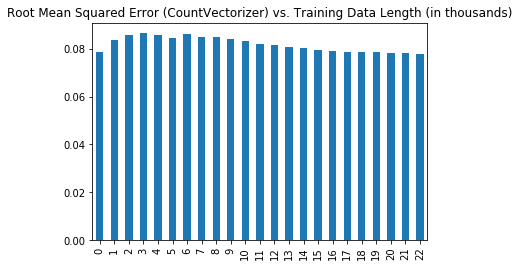

In [16]:
title = "Root Mean Squared Error (CountVectorizer) vs. Training Data Length (in thousands)"
pd.Series(count_errors).plot.bar(title=title)

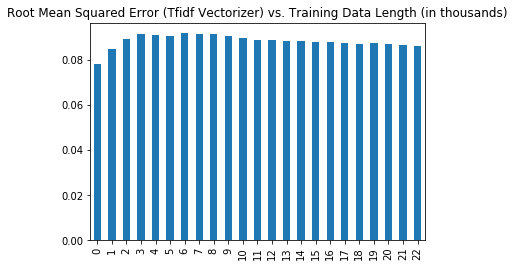

In [18]:
title = "Root Mean Squared Error (Tfidf Vectorizer) vs. Training Data Length (in thousands)"
pd.Series(tfidf_errors).plot.bar(title=title)